In [1]:
print("krishna")

krishna


In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv(r"C:\\Users\\ritik\\Downloads\\archive (9)\\spam.csv", encoding="latin1")
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

## Data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'] , inplace = True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.rename(columns = {'v1':'target' , 'v2' : 'text'} , inplace=True)
df.sample(5)

,target,text
3987,ham,Hello. Sort of out in town already. That . So ...
4996,ham,Esplanade lor. Where else...
1584,ham,"Sorry, I'll call later"
1119,spam,"Bored of speed dating? Try SPEEDCHAT, txt SPEE..."
508,ham,What's the significance?


In [9]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['target'] = lb.fit_transform(df['target'])

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
## missing value
df.isnull().sum().sum()

np.int64(0)

In [12]:
## duplicate rows
df.duplicated().sum()

np.int64(403)

In [13]:
df = df.drop_duplicates(keep = 'first')
df.duplicated().sum()

np.int64(0)

## EDA

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

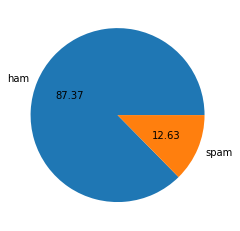

In [17]:
plt.pie(df['target'].value_counts(), labels =['ham' , 'spam'],autopct="%0.2f")
plt.show()

In [18]:
## Data is imbalanced

In [27]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ritik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_characters'] = df['text'].apply(len)
df.drop(columns=['num_aplhabets'])

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [31]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ritik\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [36]:
## nums of words
df['num_words'] = df['text'].apply(lambda x :len(nltk.word_tokenize(x)))

In [37]:
df.head()

,target,text,num_aplhabets,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,111,24
1,0,Ok lar... Joking wif u oni...,29,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,155,37
3,0,U dun say so early hor... U c already then say...,49,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,61,15


In [39]:
df.drop(columns=['num_aplhabets'],inplace=True)

In [40]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [41]:
## counting the number of sentences
df['num_sent'] = df['text'].apply(lambda x :len(nltk.sent_tokenize(x)))

In [43]:
df.head()

,target,text,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [45]:
## we have created new features like num_characters,num_words and num_sent that actually find outthe nummber of characters ,words and sentences in the text

In [46]:
df[['num_characters' , 'num_words' , 'num_sent']].describe()

,num_characters,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [50]:
df[df['target'] == 1][['num_characters' , 'num_words' , 'num_sent']].describe()

,num_characters,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [51]:
df[df['target'] == 0][['num_characters' , 'num_words' , 'num_sent']].describe()

,num_characters,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_characters', ylabel='Count'>

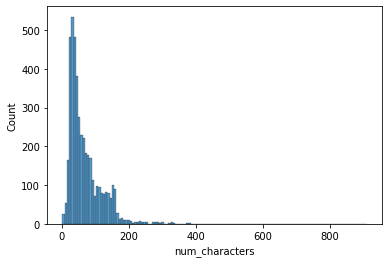

In [53]:
sns.histplot(df[df['target'] == 0]['num_characters'])

<Axes: xlabel='num_characters', ylabel='Count'>

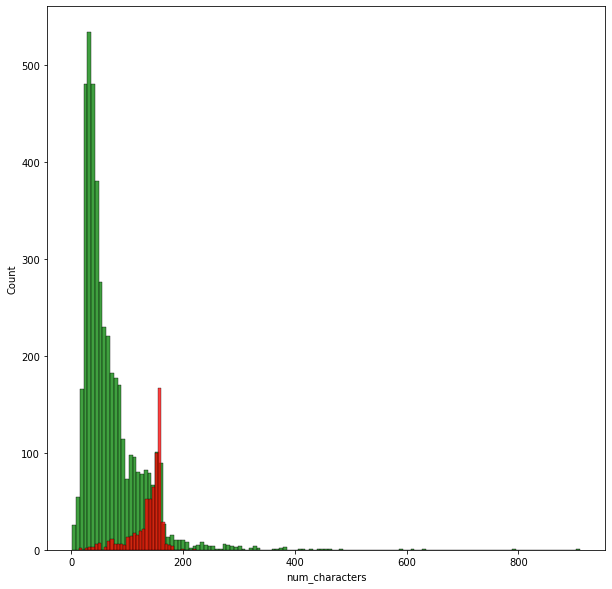

In [60]:
plt.figure(figsize=(10,10))
sns.histplot(df[df['target'] == 0]['num_characters'] , color='green')
sns.histplot(df[df['target'] == 1]['num_characters'] , color = 'red')

# Observation :
### The spam messages are made up of more number of characters 
### The ham messages are made up of comparitevely less num of characters

<Axes: xlabel='num_words', ylabel='Count'>

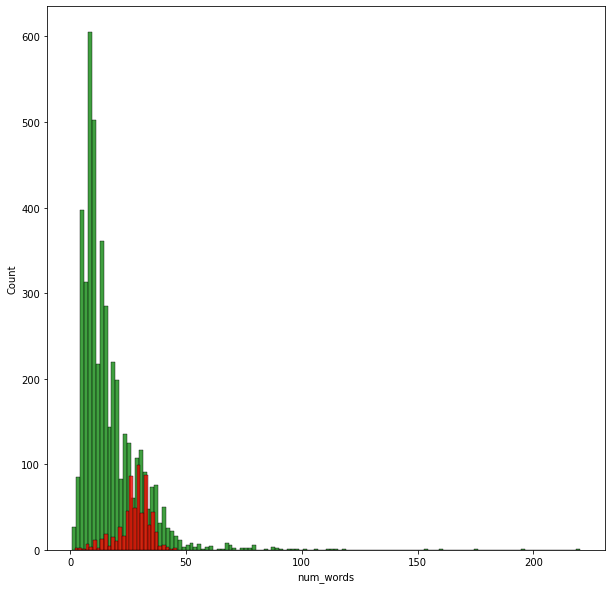

In [62]:
## numbber of words
plt.figure(figsize=(10,10))
sns.histplot(df[df['target'] == 0]['num_words'] , color='green')
sns.histplot(df[df['target'] == 1]['num_words'] , color = 'red')

<Axes: xlabel='num_sent', ylabel='Count'>

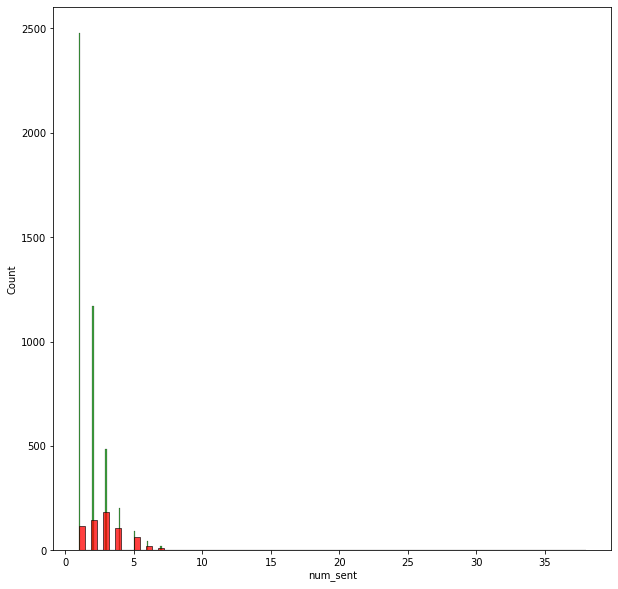

In [63]:
## number of sentences
plt.figure(figsize=(10,10))
sns.histplot(df[df['target'] == 0]['num_sent'] , color='green')
sns.histplot(df[df['target'] == 1]['num_sent'] , color = 'red')

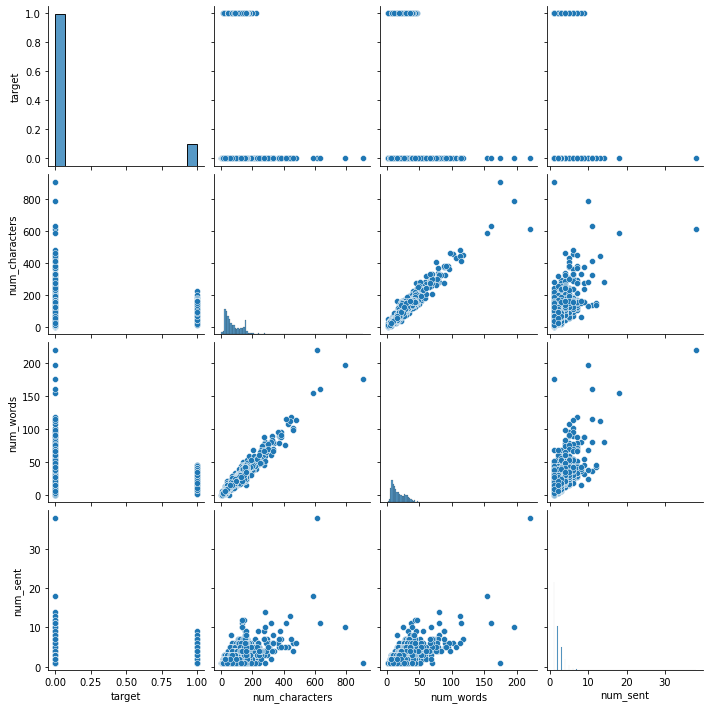

In [68]:
sns.pairplot(df)

In [76]:
## finding the correlation
df[['num_characters', 'num_words', 'num_sent','target']].corr()

,num_characters,num_words,num_sent,target
num_characters,1.000000,0.965760,0.624139,0.384717
num_words,0.965760,1.000000,0.679971,0.262912
num_sent,0.624139,0.679971,1.000000,0.263939
target,0.384717,0.262912,0.263939,1.000000


<Axes: >

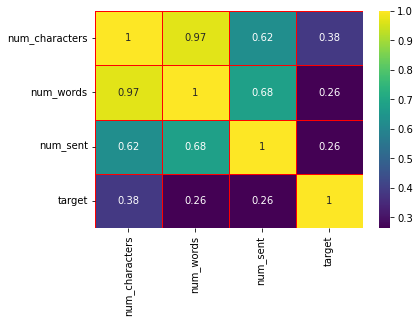

In [77]:
sns.heatmap(
    df[['num_characters', 'num_words', 'num_sent','target']].corr(),
    annot=True,
    cmap='viridis',
    linewidths=0.5,          # thickness of the lines
    linecolor='red'        # color of the lines
)

# Data Preprocessing
- lower case
- tokenization
- removing special characters
- removing stop words and punctuation
- stemming


In [111]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def transform_text(text):

    ## lowercase
    text = text.lower()

    ## tokenisation
    text = nltk.word_tokenize(text)

    ## removing the special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    ## removing stopwords and punctuations
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    ## stemming
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    


    return " ".join(y)

In [113]:
df['transformed_text'] = df['text'].apply(transform_text)

In [114]:
df.sample(3)

,target,text,num_characters,num_words,num_sent,transformed_text
695,0,Good. Good job. I like entrepreneurs,36,8,3,good good job like entrepreneur
5468,1,URGENT! Last weekend's draw shows that you hav...,143,34,5,urgent last weekend draw show cash spanish hol...
2569,0,Ultimately tor motive tui achieve korli.,40,7,1,ultim tor motiv tui achiev korli


## word cloud in spam and ham

In [134]:
from wordcloud import WordCloud
wc = WordCloud(width=500 , height = 500 , min_font_size=10 , background_color = 'white')

In [135]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

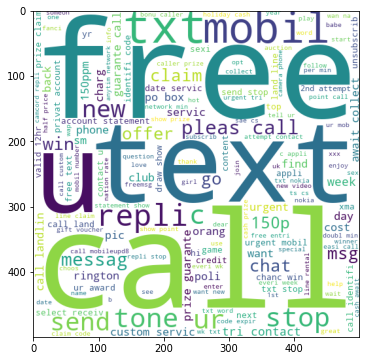

In [136]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)


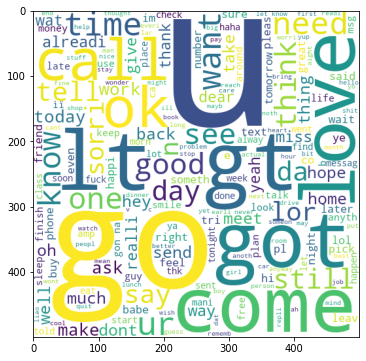

In [137]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

## finding the most frequent words

## Spam

In [144]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split( ):
        spam_corpus.append(word)


In [146]:
len(spam_corpus)

9939

<ipython-input-156-517b291b4b35>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=top_words, palette=custom_colors)


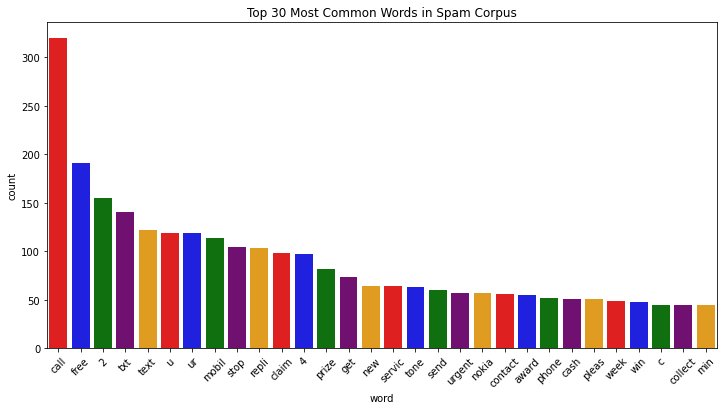

In [156]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 30 most common words and their counts
top_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])
custom_colors = ['red', 'blue', 'green', 'purple', 'orange'] * 6  
# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=top_words, palette=custom_colors)
plt.xticks(rotation=45)
plt.title("Top 30 Most Common Words in Spam Corpus")
plt.show()


## ham

In [159]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split( ):
        ham_corpus.append(word)

In [160]:
len(ham_corpus)

35404

<ipython-input-161-86b8e2ee2c76>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=top_words, palette=custom_colors)


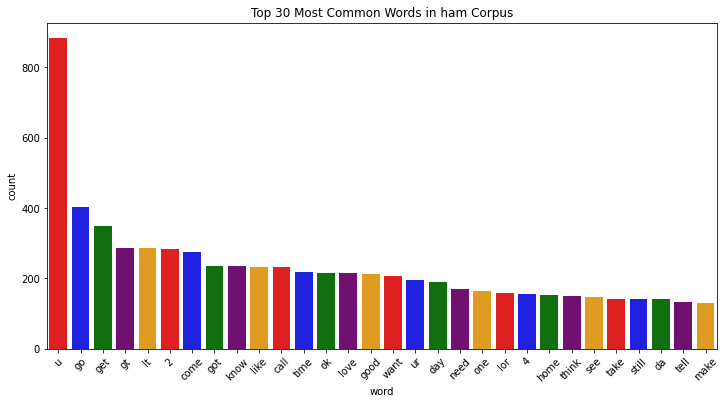

In [161]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 30 most common words and their counts
top_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])
custom_colors = ['red', 'blue', 'green', 'purple', 'orange'] * 6  
# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=top_words, palette=custom_colors)
plt.xticks(rotation=45)
plt.title("Top 30 Most Common Words in ham Corpus")
plt.show()

## Model training